# Online Forecasting Matrix Factorization

**From**: San Gultekin, John Paisley, 2019. Online forecasting matrix factorization. IEEE Transactions on Signal Processing, 67(5): 1223-1236.

### Part 1: Model Description

Suppose that a multivariate time series can be represented by an $M\times T$ matrix $X$. If $d$ denotes the rank of this matrix, then it is possible to find a $d\times M$ matrix $U$ and a $d\times T$ matrix $V$ such that $X=U^TV$. Since the matrix $V$ is $d\times T$, it corresponds to a compression of the original $M\times T$ matrix $X$. Therefore, the matrix $V$ is itself a multivariate time series, while the matrix $U$ provides the combination coefficients to reconstruct $X$ from $V$.

$$U_t=U_{t-1}+\eta_{U,t},\\
\boldsymbol{v}_{t}=\theta_1\boldsymbol{v}_{t-1}+\cdots+\theta_P\boldsymbol{v}_{t-P}+\eta_{\boldsymbol{v},t}=\sum_{p=1}^{P}\theta_p\boldsymbol{v}_{t-p}, \\
\boldsymbol{x}_{t}=U_{t}^{T}\boldsymbol{v}_{t}+\eta_{\boldsymbol{x},t},$$
where $\eta_{U,t}$, $\eta_{\boldsymbol{v},t}$, and $\eta_{\boldsymbol{x},t}$ are white noises.

### Part 2: Matrix Factorization

#### A. Fixed penalty (FP) constriant

In such online case, at each time a single column of $X$ is observed. Using the above model, at time $t$ we would like to minimize the following loss function

$$f\left(U_{t},\boldsymbol{v}_{t}\right)=\left\|\boldsymbol{x}_{t}-U_{t}^{T}\boldsymbol{v}_{t}\right\|_{2}^{2}+\rho_{u}\left\|U_{t}-U_{t-1}\right\|_{F}^{2}+\rho_{v}\left\|\boldsymbol{v}_{t}-\sum_{p=1}^{P}\theta_p\boldsymbol{v}_{t-p}\right\|_{2}^{2}.$$

This is called a fixed penalty (FP) matrix factorization in the article.

Setting $\rho_{u}\gg\rho_{v}$ means FP will find a solution for which $U_{t}$ is close to $U_{t-1}$, i.e., $U_{t}$ is slowly time-varying. This agrees with the interpretation that, in the batch case $U$ is fixed set of coefficients and $V$ contains the compressed time series.

Another caution here is that, setting $\rho_{v}$ high would over-constrain the problem as both $U_{t}$ and $\boldsymbol{v}_{t}$ would be forced to stay close to $U_{t-1}$ and $\sum_{p=1}^{P}\theta_{p}\boldsymbol{v}_{t-p}$ while trying to minimize the approximation error to $\boldsymbol{x}_{t}$. The update equations for FP are

$$U_{t}\gets \left(\rho_{u}I+\boldsymbol{v}_{t}\boldsymbol{v}_{t}^{T}\right)^{-1}\left(\rho_{u}U_{t-1}+\boldsymbol{v}_{t}\boldsymbol{x}_{t}^{T}\right), \\
\boldsymbol{v}_{t}^{(i)}\gets \left(\rho_{v}I+U_{t}U_{t}^{T}\right)^{-1}\left(\rho_{v}\sum_{p=1}^{P}\theta_{p}\boldsymbol{v}_{t-p}+U_{t}\boldsymbol{x}_{t}\right).$$

The FP matrix factorization is summarized in Algorithm 1.

>**Drawback**: The fixed penalty approach to matrix factorization suffers from several potential issues. While $\rho_{v}$ can be set to a small number, setting $\rho_{u}$ well has a major impact on performance. It is usually not clear a *priori* while values would yield good results, and often times this may require a large number of cross validations. Another drawback is that $\rho_{u}$ is fixed for the entire data stream. This may not be desirable as changing the regularization level at different time points may improve performance.

#### B. Fixed tolerance (FT) constraint

For the above reasons, it can be useful to allow for time varying, self-tunable regularization. Consider the following optimization problem

$$\min_{U_{t},\boldsymbol{v}_{t}}~~\left\|U_{t}-U_{t-1}\right\|_{F}^{2}+\left\|\boldsymbol{v}_{t}-\sum_{p=1}^{P}\theta_p\boldsymbol{v}_{t-p}\right\|_{2}^{2} \\
\text{s.t.}~~\left\|\boldsymbol{x}_{t}-U_{t}^{T}\boldsymbol{v}_{t}\right\|_{2}^{2}\leq\epsilon$$
where the new parameter $\epsilon$ forces the approximation error to remain below $\epsilon$. The objective function of FT can be optimized by coordinate descent.

- Update for $U_{t}$: For a fixed $\boldsymbol{v}_{t}$, the Lagrangian and optimal update for $U_{t}$ are

$$\mathcal{L}\left(U_{t},\lambda\right)=\left\|U_{t}-U_{t-1}\right\|_{F}^{2}+\lambda\left\|\boldsymbol{x}_{t}-U_{t}^{T}\boldsymbol{v}_{t}\right\|_{2}^{2}-\lambda\epsilon, \\
\implies U_{t}\gets \left(\lambda^{-1}I+\boldsymbol{v}_{t}\boldsymbol{v}_{t}^{T}\right)^{-1}\left(\lambda^{-1}U_{t-1}+\boldsymbol{v}_{t}\boldsymbol{v}_{t}^{T}\right).$$

- Update for $\boldsymbol{x}_{t}$: For a fixed $U_{t}$, the Lagrangian and optimal update for $\boldsymbol{v}_{t}$ are

$$\mathcal{L}\left(\boldsymbol{v}_{t},\lambda\right)=\left\|\boldsymbol{v}_{t}-\sum_{p=1}^{P}\theta_p\boldsymbol{v}_{t-p}\right\|_{2}^{2}+\lambda\left\|\boldsymbol{x}_{t}-U_{t}^{T}\boldsymbol{x}_{t}\right\|_{2}^{2}-\lambda\epsilon, \\
\implies \boldsymbol{v}_{t}\gets \left(\lambda^{-1}I+U_{t}U_{t}^{T}\right)^{-1}\left(\lambda^{-1}\sum_{p=1}^{P}\theta_{p}\boldsymbol{v}_{t-p}+U_{t}\boldsymbol{x}_{t}\right).$$

- Optimizing the Lagrange Multiplier $\lambda$: Defining

$$c_1=\left\|\boldsymbol{x}_{t}-U_{t-1}\boldsymbol{v}_{t}\right\|_{2}^{2},~c_2=\left\|\boldsymbol{v}_{t}\right\|_{2}^{2},$$
and setting the Lagrange multiplier to

$$\lambda^{*}=\frac{\sqrt{c_1}}{c_2\sqrt{\epsilon}}-\frac{1}{c_2}$$

the optimal update for $U_{t}$ is

$$U_{t}\gets \left(I+\lambda^{*}\boldsymbol{v}_{t}\boldsymbol{v}_{t}^{T}\right)^{-1}\left(U_{t-1}+\lambda^{*}\boldsymbol{v}_{t}\boldsymbol{v}_{t}^{T}\right).$$

#### C. Zero tolerance (ZT) constraint

This case estimates the latent factors $U_{t}$ and $\boldsymbol{v}_{t}$ that are as close to the prior as possible, while allowing no approximation error on $\boldsymbol{x}_{t}$. The optimization problem now becomes

$$\min_{U_{t},\boldsymbol{v}_{t}}~~\left\|U_{t}-U_{t-1}\right\|_{F}^{2}+\left\|\boldsymbol{v}_{t}-\sum_{p=1}^{P}\theta_p\boldsymbol{v}_{t-p}\right\|_{2}^{2} \\
\text{s.t.}~~U_{t}^{T}\boldsymbol{v}_{t}=\boldsymbol{x}_{t}.$$

Optimizing $U_{t}$ given $\boldsymbol{v}_{t}$ can be done with Lagrange multipliers. Following a rescaling, the Lagrangian is given by

$$\mathcal{L}\left(\boldsymbol{U}_{t}, \boldsymbol{\lambda}\right)=\frac{1}{2}\left\|\boldsymbol{U}_{t}-\boldsymbol{U}_{t-1}\right\|_{F}^{2}+\boldsymbol{\lambda}^{T}\left(\boldsymbol{x}_{t}-\boldsymbol{U}_{t} \boldsymbol{v}_{t}\right).$$

The stationary conditions are

$$\begin{aligned} \nabla_{\boldsymbol{U}_{t}} \mathcal{L}\left(\boldsymbol{U}_{t}, \boldsymbol{\lambda}\right) &=0=\boldsymbol{U}_{t}-\boldsymbol{U}_{t-1}+\boldsymbol{v}_{t} \boldsymbol{\lambda}^{T}, \\ \nabla_{\boldsymbol{\lambda}} \mathcal{L}\left(\boldsymbol{U}_{t}, \boldsymbol{\lambda}\right) &=0=\boldsymbol{U}_{t-1}^{T} \boldsymbol{v}_{t}-\boldsymbol{x}_{t}. \end{aligned}$$

The solution is then

$$\boldsymbol{\lambda}=\frac{\boldsymbol{U}_{t-1}^{T} \boldsymbol{v}_{t}-\boldsymbol{x}_{t}}{\boldsymbol{v}_{t}^{T} \boldsymbol{v}_{t}}, \boldsymbol{U}_{t}=\boldsymbol{U}_{t-1}-\boldsymbol{v}_{t} \boldsymbol{\lambda}^{T}.$$

Update $\boldsymbol{v}_{t}$ by

$$\boldsymbol{v}_{t} \leftarrow\left(\rho_{v} \boldsymbol{I}+\boldsymbol{U}_{t} \boldsymbol{U}_{t}^{T}\right)^{-1}\left(\rho_{v} \sum_{p=1}^{P}\theta_p\boldsymbol{v}_{t-p}+\boldsymbol{U}_{t} \boldsymbol{x}_{t}\right).$$

### Part 3: Optimizing AR Coefficients

Let $\boldsymbol{v}_{t}=\boldsymbol{P}_{t} \boldsymbol{\theta}$ where $\boldsymbol{P}_{t}=\left[\boldsymbol{v}_{t-1} \cdots \boldsymbol{v}_{t-P}\right]$ is a $d\times P$ patch matrix of the provious $P$ columns, then we have

$$\widehat{\boldsymbol{\theta}}=\left[\sum_{t=1}^{T} \boldsymbol{P}_{t}^{\top} \boldsymbol{P}_{t}+\boldsymbol{\Sigma}_{\boldsymbol{\theta}}^{-1}\right]^{-1}\left[\sum_{t=1}^{T} \boldsymbol{P}_{t}^{\top} \boldsymbol{v}_{t}\right],$$
where we consider the case $\boldsymbol{\Sigma}_{\boldsymbol{\theta}}=r_{0} \boldsymbol{I}$ for a tunable parameter $r_0$.

In [113]:
import numpy as np

def FP(xt, rho_u, rho_v, Ut_minus, vt_minus, maxiter):
    """Fixed Penalty Matrix Factorization (FP)."""
    Ut = Ut_minus
    binary_vec = np.zeros(xt.shape)
    pos = np.where(xt > 0)
    binary_vec[pos] = 1
    for i in range(maxiter):
        mat = np.einsum('ij, j -> ij', Ut, binary_vec)
        vt = np.matmul(np.linalg.inv(rho_v * np.eye(vt_minus.shape[0]) 
                                     + np.matmul(mat, mat.T)), rho_v * vt_minus + np.matmul(Ut, xt))
        Ut = np.matmul(np.linalg.inv(rho_u * np.eye(vt_minus.shape[0]) 
                                     + np.outer(vt, vt)), rho_u * Ut_minus + np.outer(vt, xt))
    return Ut, vt

In [2]:
def FT(xt, epsilon, rho_v, Ut_minus, vt_minus, maxiter):
    """Fixed Tolerance Matrix Factorization (FT)."""
    Ut = Ut_minus
    for i in range(maxiter):
        vt = np.matmul(np.linalg.inv(rho_v * np.eye(vt_minus.shape[0]) 
                                     + np.matmul(Ut, Ut.T)), rho_v * vt_minus + np.matmul(Ut, xt))
        c1 = np.linalg.norm(xt - np.matmul(Ut_minus.T, vt)) ** 2
        c2 = np.linalg.norm(vt) ** 2
        lambda_star = np.sqrt(c1)/(c2 * np.sqrt(epsilon)) - 1/c2
        Ut = np.matmul(np.linalg.inv(np.eye(vt_minus.shape[0]) 
                                     + lambda_star * np.outer(vt, vt)), 
                       Ut_minus + lambda_star * np.outer(vt, xt))
        return Ut, vt

In [3]:
def ZT(xt, rho_v, Ut_minus, vt_minus, maxiter):
    """Zero Tolerance Matrix Factorization (ZT)."""
    Ut = Ut_minus
    for i in range(maxiter):
        vt = np.matmul(np.linalg.inv(rho_v * np.eye(vt_minus.shape[0]) 
                                     + np.matmul(Ut, Ut.T)), rho_v * vt_minus + np.matmul(Ut, xt))
        lambda_vec = (np.matmul(Ut_minus.T, vt) - xt)/(np.linalg.norm(vt) ** 2)
        Ut = Ut_minus - np.outer(vt, lambda_vec)
    return Ut, vt

In [160]:
def OnlineMF(X, pred_time_steps, d, P, r0, rho_u, epsilon, rho_v, maxiter):
    """Online Forecasting Matrix Factorization."""
    binary_mat = np.zeros(X.shape)
    pos = np.where(X > 0)
    binary_mat[pos] = 1
    U0 = np.random.rand(d, X.shape[0])
    V0 = np.random.rand(d, X.shape[1])
    v0 = np.random.rand(d)
    X_new = X[:, 0 : X.shape[1] - pred_time_steps - 1]
    for i in range(maxiter):
        for m in range(X_new.shape[0]):
            mat = np.einsum('ij, j -> ij', V0[:, 0 : X_new.shape[1]], 
                            binary_mat[m, 0 : X_new.shape[1]])
            U0[:, m] = np.matmul(np.linalg.inv(rho_v * np.eye(d) 
                                               + np.matmul(mat, mat.T)), 
                                 np.matmul(V0[:, 0 : X_new.shape[1]], X_new[m, :]))
        for n in range(X_new.shape[1]):
            mat = np.einsum('ij, j -> ij', U0, binary_mat[:, n])
            V0[:, n] = np.matmul(np.linalg.inv(rho_v * np.eye(d) 
                                               + np.matmul(mat, mat.T)), np.matmul(U0, X_new[:, n]))
    pos1 = np.where(X_new > 0)
    print('Train_loss: ')
    print(np.sqrt(np.linalg.norm((X_new - np.matmul(U0.T, V0[:, 0 : X_new.shape[1]]))[pos1]) ** 2/X_new[pos1].shape[0]))
    print()
    mat0 = np.zeros((P, P))
    vec0 = np.zeros(P)
    for t in range(X_new.shape[1] - P):
        Pt = V0[:, t : t + P]
        mat0 += np.matmul(Pt.T, Pt)
        vec0 += np.matmul(Pt.T, V0[:, t + P])
    theta_vec = np.matmul(np.linalg.inv(mat0 + np.eye(P)), vec0)
    r_l0 = r0 * np.eye(P)
    r_r0 = 0
    Xt = np.zeros((X.shape[0], pred_time_steps))
    Ut = U0
    r_lt_minus = r_l0
    r_rt_minus = r_r0
    for t in range(pred_time_steps):
        Ut_minus = Ut
        Pt = V0[:, X.shape[1] - pred_time_steps + t - 1 - P : X.shape[1] - pred_time_steps + t - 1]
        vt_minus = np.matmul(Pt, theta_vec)
        Ut, vt = FP(X[:, X.shape[1] - pred_time_steps + t - 1], rho_u, rho_v, Ut_minus, vt_minus, maxiter)
#         Ut, vt = FT(X[:, X.shape[1] - pred_time_steps + t], epsilon, rho_v, Ut_minus, vt_minus, maxiter)
        V0[:, X.shape[1] - pred_time_steps + t - 1] = vt
        r_lt = r_lt_minus + np.matmul(Pt.T, Pt)
        r_rt = r_rt_minus + np.matmul(Pt.T, vt)
        theta_vec = np.matmul(np.linalg.inv(r_lt), r_rt)
        r_lt_minus = r_lt
        r_rt_minus = r_rt
        Pt0 = V0[:, X.shape[1] - pred_time_steps + t - P : X.shape[1] - pred_time_steps + t]
        vt = np.matmul(Pt0, theta_vec)
        Xt[:, t] = np.matmul(Ut.T, vt)
        if (t + 1) % 20 == 0:
            print('Time step: {}'.format(t + 1))
    return Xt

## Data Organization

### Part 1: Matrix Structure

We consider a dataset of $m$ discrete time series $\boldsymbol{y}_{i}\in\mathbb{R}^{f},i\in\left\{1,2,...,m\right\}$. The time series may have missing elements. We express spatio-temporal dataset as a matrix $Y\in\mathbb{R}^{m\times f}$ with $m$ rows (e.g., locations) and $f$ columns (e.g., discrete time intervals),

$$Y=\left[ \begin{array}{cccc} y_{11} & y_{12} & \cdots & y_{1f} \\ y_{21} & y_{22} & \cdots & y_{2f} \\ \vdots & \vdots & \ddots & \vdots \\ y_{m1} & y_{m2} & \cdots & y_{mf} \\ \end{array} \right]\in\mathbb{R}^{m\times f}.$$

### Part 2: Tensor Structure

We consider a dataset of $m$ discrete time series $\boldsymbol{y}_{i}\in\mathbb{R}^{nf},i\in\left\{1,2,...,m\right\}$. The time series may have missing elements. We partition each time series into intervals of predifined length $f$. We express each partitioned time series as a matrix $Y_{i}$ with $n$ rows (e.g., days) and $f$ columns (e.g., discrete time intervals per day),

$$Y_{i}=\left[ \begin{array}{cccc} y_{11} & y_{12} & \cdots & y_{1f} \\ y_{21} & y_{22} & \cdots & y_{2f} \\ \vdots & \vdots & \ddots & \vdots \\ y_{n1} & y_{n2} & \cdots & y_{nf} \\ \end{array} \right]\in\mathbb{R}^{n\times f},i=1,2,...,m,$$

therefore, the resulting structure is a tensor $\mathcal{Y}\in\mathbb{R}^{m\times n\times f}$.

In [166]:
import scipy.io
from tensorly import unfold

tensor = scipy.io.loadmat('Guangzhou-data-set/tensor.mat')
tensor = tensor['tensor']
random_matrix = scipy.io.loadmat('Guangzhou-data-set/random_matrix.mat')
random_matrix = random_matrix['random_matrix']
random_tensor = scipy.io.loadmat('Guangzhou-data-set/random_tensor.mat')
random_tensor = random_tensor['random_tensor']

dense_mat = unfold(tensor, 0)
missing_rate = 0.0

# =============================================================================
### Random missing (RM) scenario:
### ------------------------------
###   missing rate | 0.2 | 0.4 |
###   rank         |  80 |  80 |
### ------------------------------
### Set the RM scenario by:
# binary_mat = unfold(np.round(random_tensor + 0.5 - missing_rate), 0)
# =============================================================================

# =============================================================================
### Non-random missing (NM) scenario:
### ------------------------------
###   missing rate | 0.2 | 0.4 |
###   rank         |  10 |  10 |
### ------------------------------
### Set the NM scenario by:
binary_tensor = np.zeros(tensor.shape)
for i1 in range(tensor.shape[0]):
    for i2 in range(tensor.shape[1]):
        binary_tensor[i1,i2,:] = np.round(random_matrix[i1,i2] + 0.5 - missing_rate)
binary_mat = unfold(binary_tensor, 0)
# =============================================================================

sparse_mat = np.multiply(dense_mat, binary_mat)

In [178]:
import time
start = time.time()
pred_time_steps = 720
d = 10
P = 144
r0 = 1
rho_u = 1
epsilon = 0.05
rho_v = 1e-4
maxiter = 100
Xt = OnlineMF(sparse_mat, pred_time_steps, d, P, r0, rho_u, epsilon, rho_v, maxiter)
small_sparse_mat = sparse_mat[:, sparse_mat.shape[1] - pred_time_steps : sparse_mat.shape[1]]
small_dense_mat = dense_mat[:, dense_mat.shape[1] - pred_time_steps : dense_mat.shape[1]]
pos = np.where(small_dense_mat > 0)
final_mape = np.sum(np.abs(small_dense_mat[pos] - 
                           Xt[pos])/small_dense_mat[pos])/small_dense_mat[pos].shape[0]
final_rmse = np.sqrt(np.sum((small_dense_mat[pos] - 
                             Xt[pos]) ** 2)/small_dense_mat[pos].shape[0])
print('Final MAPE: {:.6}'.format(final_mape))
print('Final RMSE: {:.6}'.format(final_rmse))
print()
end = time.time()
print('Running time: %d seconds'%(end - start))

Train_loss: 
3.9455716288624343

Time step: 20
Time step: 40
Time step: 60
Time step: 80
Time step: 100
Time step: 120
Time step: 140
Time step: 160
Time step: 180
Time step: 200
Time step: 220
Time step: 240
Time step: 260
Time step: 280
Time step: 300
Time step: 320
Time step: 340
Time step: 360
Time step: 380
Time step: 400
Time step: 420
Time step: 440
Time step: 460
Time step: 480
Time step: 500
Time step: 520
Time step: 540
Time step: 560
Time step: 580
Time step: 600
Time step: 620
Time step: 640
Time step: 660
Time step: 680
Time step: 700
Time step: 720
Final MAPE: 0.0821777
Final RMSE: 3.67917

Running time: 45 seconds


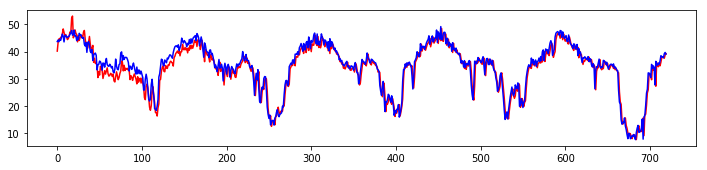

In [179]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 2.5))
road = 0
plt.plot(Xt[road, :], 'r', small_dense_mat[road, :], 'b')
plt.show()

**Experiment results** of short-term traffic prediction with missing values using Online matrix factorization (OnlineMF):

|  scenario |model choice|`rank`|`time_lags`(`P`)|`maxiter`|       mape |      rmse |
|:----------|-----:|-----:|---------:|---------:|-----------:|----------:|
|**0.2, NM**| Fixed penalty |   10 |     3 |      15 |     0.2065 | **17.8952**|
|**0.2, NM**| Fixed penalty |   10 |    144 |      15 |     0.2065 | **17.8954**|
|**0.2, RM**| Fixed penalty |   80 |    144 |      15 |     0.2037 | **17.6164**|
|**0.2, RM**| Fixed tolerance |   80 |    144 |      15 |     0.2037 | **17.6164**|
|**0.2, RM**| Zero tolerance |   80 |    144 |      15 |     0.2037 | **17.6164**|
|**dense data**| Fixed penalty |   10 |    144 |      15 |     0.0961 | **4.2505**|
|**dense data**| Fixed penalty |   10 |    144 |      50 |     0.0863 | **3.8438**|
|**dense data**| Fixed penalty |   10 |    144 |      50 |     0.0822 | **3.6792**|

   > The experiment relies on the *Urban traffic speed data set in Guangzhou, China*.